In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline #mülakatlarda çıkabilir

In [2]:
data=pd.read_csv('3-customersatisfaction.csv')

In [3]:
data.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


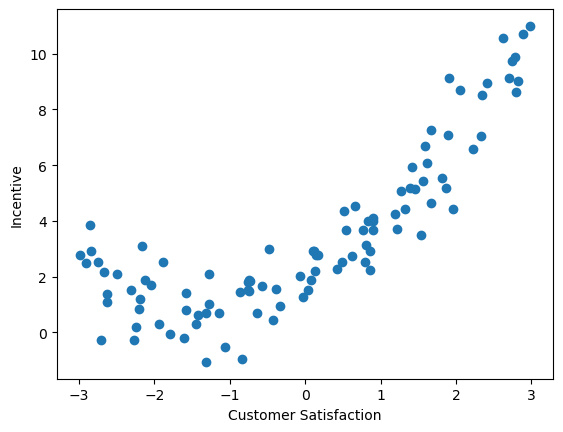

In [15]:
plt.scatter(data['Customer Satisfaction'],data['Incentive'])
plt.xlabel('Customer Satisfaction')
plt.ylabel('Incentive')
plt.show()

In [17]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [19]:
X=data[['Customer Satisfaction']] #dataframe olarak gelsin diye çift parantez kullandık
y=data['Incentive']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [21]:
scaler=StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
predict_1=model.predict(X_test)

In [26]:
r2_score(y_test,predict_1)

0.48101046891336574

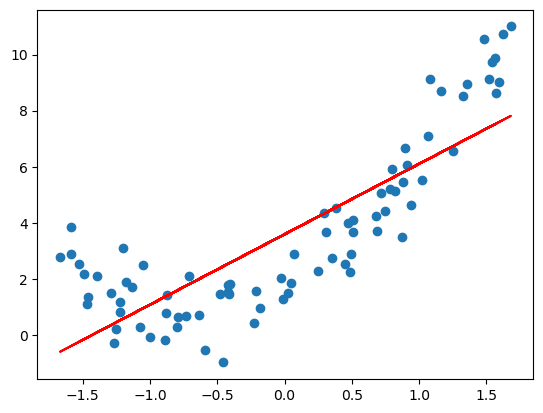

In [28]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train),color='r')

In [29]:
#best fit line tam oturmuyor daha polinomsal olması gerek

In [31]:
poly=PolynomialFeatures(degree=2,include_bias=True) #include bias teta0 ekler(katsayı) 

In [32]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

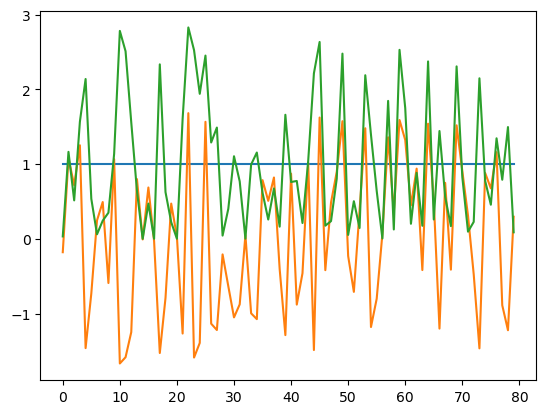

In [36]:
plt.plot(X_train_poly)

In [37]:
model.fit(X_train_poly,y_train)

LinearRegression()

In [38]:
predict_2=model.predict(X_test_poly)

In [39]:
r2_score(y_test,predict_2)

0.6912331478254937

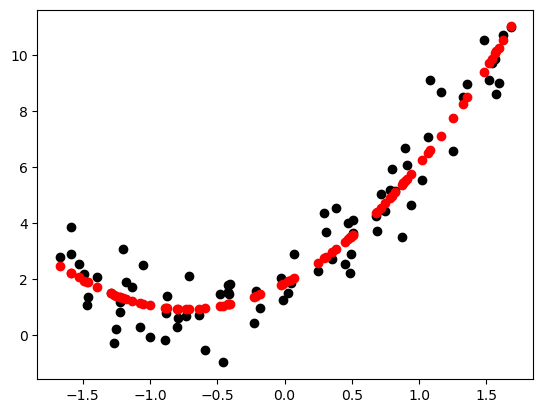

In [43]:
plt.scatter(X_train,y_train,color='black')
plt.scatter(X_train,model.predict(X_train_poly),color='r')

In [44]:
print(model.coef_)
print(model.intercept_)

[0.         2.52640217 1.74378939]
1.8479890832522676


In [45]:
#diyelim ki yeni datalar geldi ve tahmin yaparak sonuclar elde etmemiz gerek

In [78]:
new_data=pd.read_csv('3-newdatas.csv')

In [79]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [80]:
#kolon adı değiştirme
new_data.rename(columns={'0':'CustomerS'},inplace=True)

In [81]:
new_data

,CustomerS
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [82]:
new_data=scaler.fit_transform(new_data)

In [83]:
new_data_poly=poly.transform(new_data)

In [84]:
predict_3=model.predict(new_data_poly)

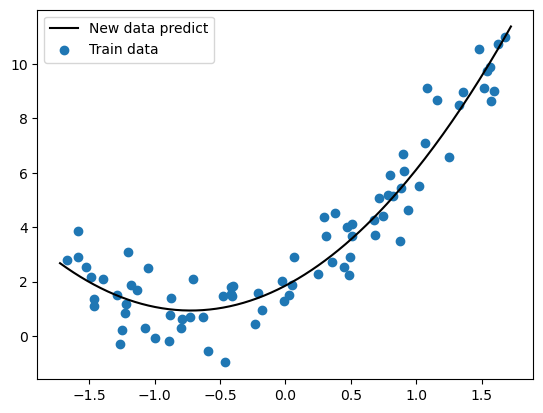

In [86]:
plt.plot(new_data,predict_3,color='black',label='New data predict')
plt.scatter(X_train,y_train,label='Train data')
plt.legend()
plt.show()

In [87]:
#pipeline

In [100]:
def poly_model(degree):
    poly_features=PolynomialFeatures(degree=degree)
    scaler=StandardScaler()
    model=LinearRegression()
    pipeline=Pipeline([
            ('standart_scaler',scaler),
            ('poly_features',poly_features),
            ('model',model)
        
    ])
    pipeline.fit(X_train,y_train)
    score=pipeline.score(X_test,y_test)
    print("R^2 score:",score)
    y_pred_new=pipeline.predict(new_data)
    plt.plot(new_data,y_pred_new,color='black',label='New data predict')
    plt.scatter(X_train,y_train,label='Train data')
    plt.legend()
    plt.show()

R^2 score: -0.12836590871050135


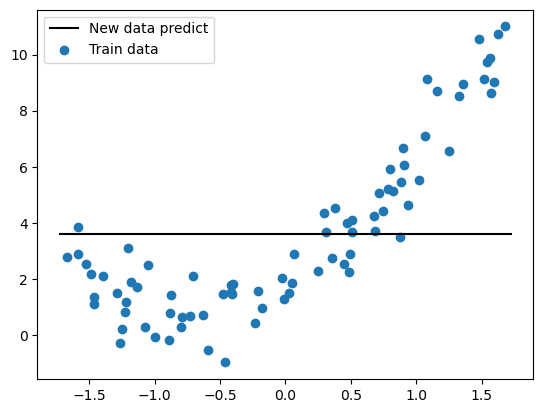

R^2 score: 0.48101046891336563


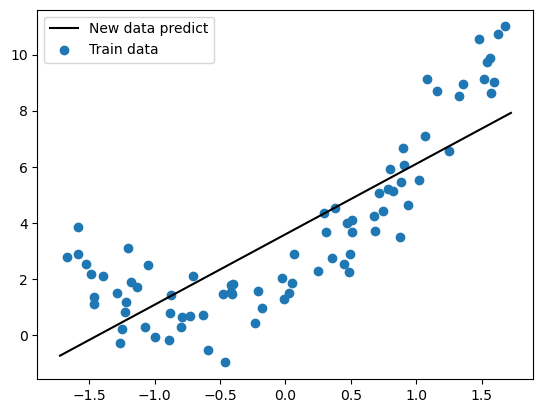

R^2 score: 0.6912331478254937


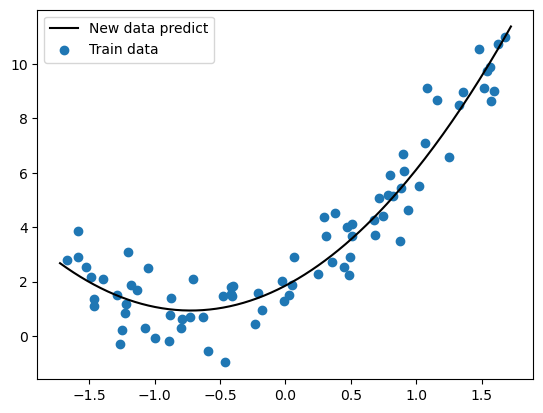

R^2 score: 0.6707867943206025


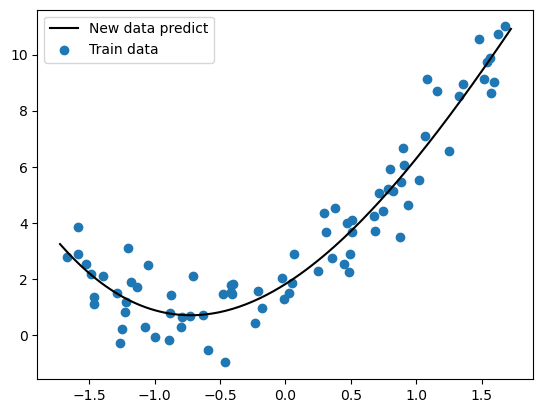

R^2 score: 0.6747382286716823


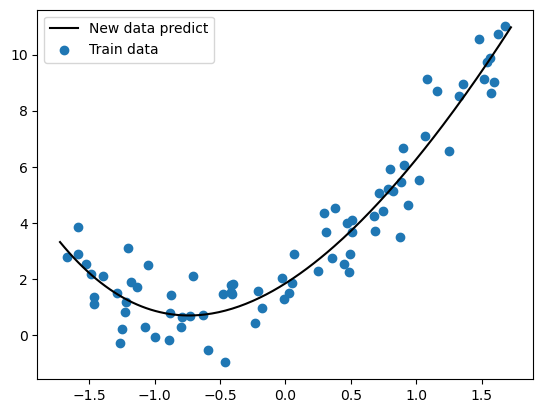

R^2 score: 0.66158982710958


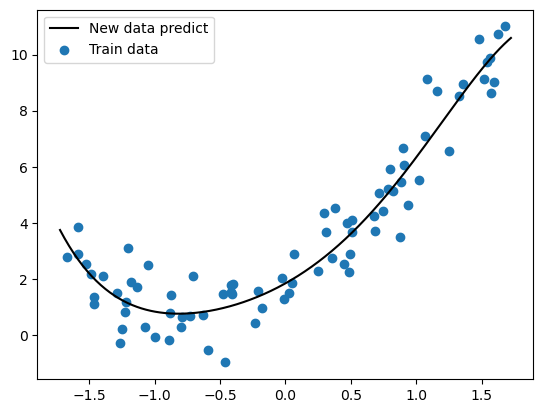

R^2 score: 0.6620582284410272


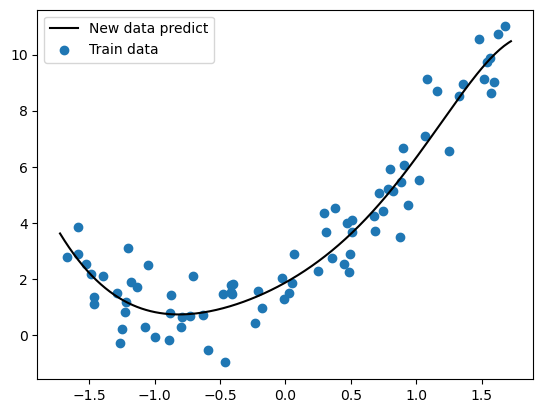

R^2 score: 0.66288470098316


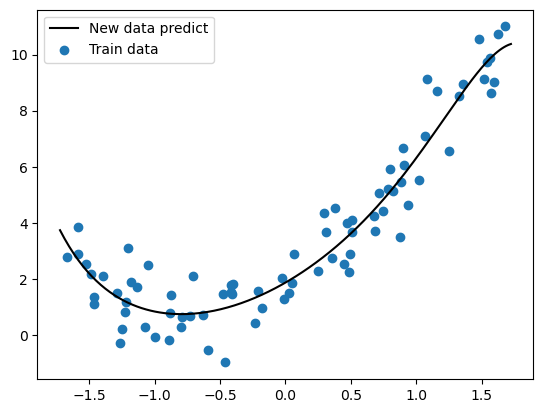

R^2 score: 0.6663675381899595


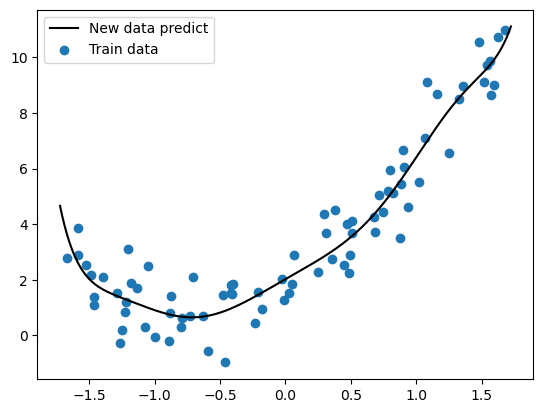

R^2 score: 0.6177735046981553


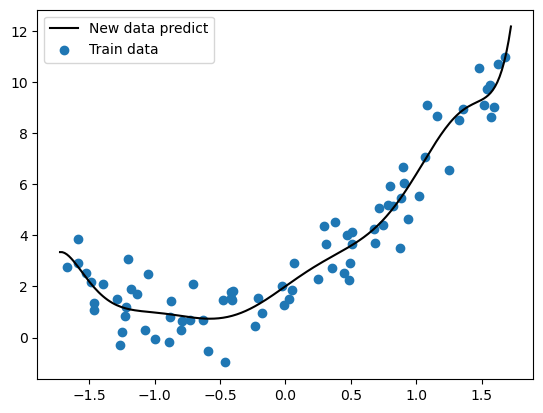

In [102]:
for i in range(10):
    poly_model(i)